In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df_virus=pd.read_csv('aggregate_covid_country.csv')
df_virus

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
df_virus.describe

<bound method NDFrame.describe of              Date             Country  Confirmed  Recovered  Deaths
0      2020-01-22         Afghanistan          0          0       0
1      2020-01-22             Albania          0          0       0
2      2020-01-22             Algeria          0          0       0
3      2020-01-22             Andorra          0          0       0
4      2020-01-22              Angola          0          0       0
...           ...                 ...        ...        ...     ...
23683  2020-05-26  West Bank and Gaza        429        365       3
23684  2020-05-26      Western Sahara          9          6       1
23685  2020-05-26               Yemen        249         10      49
23686  2020-05-26              Zambia        920        336       7
23687  2020-05-26            Zimbabwe         56         25       4

[23688 rows x 5 columns]>

In [5]:
df_virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


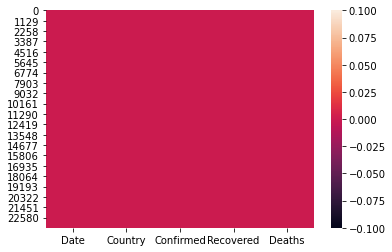

In [7]:
sns.heatmap(df_virus.isnull())

In [9]:
df_virus.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

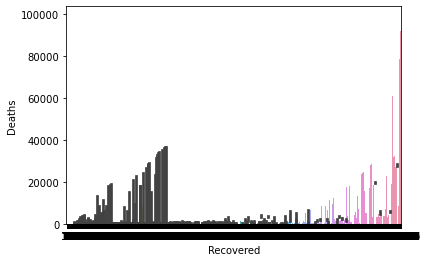

In [11]:
sns.barplot(y='Deaths', x='Recovered', data=df_virus)
plt.show()

In [15]:
from scipy.stats import zscore
z_score=abs(zscore(df_virus))
print(df_virus.shape)
df_virus_final=df_virus.loc[(z.score<3).all(axis=1)]
print(df_virus_final.shape)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

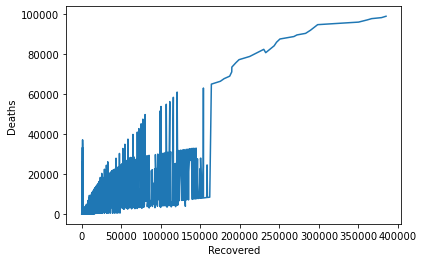

In [14]:
sns.lineplot(x=df_virus['Recovered'], y=df_virus['Deaths'], data=df_virus)
plt.show()

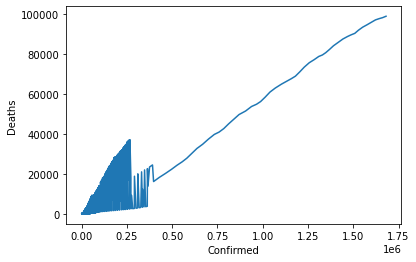

In [21]:
sns.lineplot(x=df_virus['Confirmed'], y=df_virus['Deaths'], data=df_virus)
plt.show()

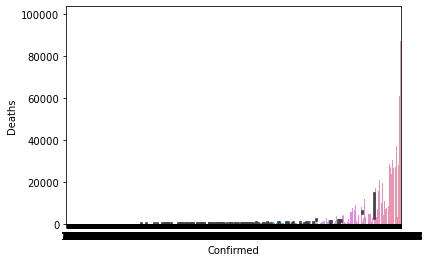

In [16]:
sns.barplot(x='Confirmed', y='Deaths', data=df_virus)
plt.show()

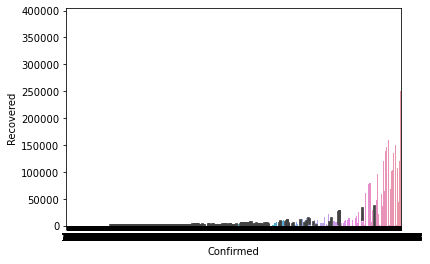

In [19]:
sns.barplot(x='Confirmed', y='Recovered', data=df_virus)
plt.show()

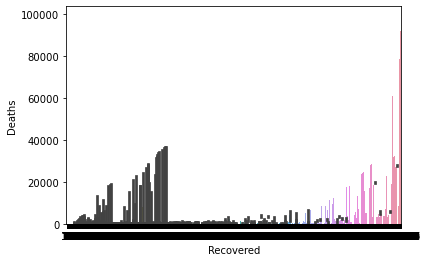

In [20]:
sns.barplot(x='Recovered', y='Deaths', data=df_virus)
plt.show()

In [26]:
df_x=df_virus.drop(columns=['Deaths', 'Date'])
y=pd.DataFrame(df_virus['Deaths'])

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

ValueError: could not convert string to float: 'Afghanistan'

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
max_r_score=0
for r_state in range(800,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= r_state,test_size=.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_e_score=r2_scr
        final_r_state=r_state
    print('max r2 score corresponding to', final_r_state, 'is', max_r_score)

NameError: name 'x' is not defined

In [30]:
Death=df_virus['Deaths']

In [32]:
print("mean Death:" , Death.mean())
print("Standard deviation", Death.std())
print("minium Death", Death.min())
print("maximum Death", Death.max())

mean Death: 526.9350303951368
Standard deviation 3992.8159558265793
minium Death 0
maximum Death 98913


In [33]:
Recovery=df_virus['Recovered']


In [38]:
Countries=df_virus['Country']

In [34]:
print("mean Recovery:" , Recovery.mean())
print("Standard deviation", Recovery.std())
print("minium Recovery", Recovery.min())
print("maximum Recovery", Recovery.max())

mean Recovery: 2581.8017139479907
Standard deviation 15143.101257146784
minium Recovery 0
maximum Recovery 384902


Text(0, 0.5, 'number')

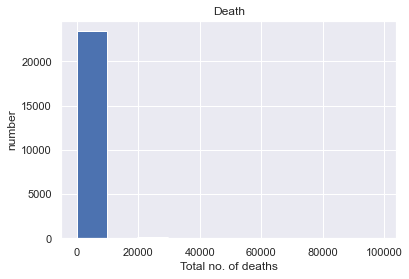

In [40]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.hist(Death)
plt.title("Death")
plt.xlabel("Total no. of deaths")
plt.ylabel('number')

Text(0, 0.5, 'number')

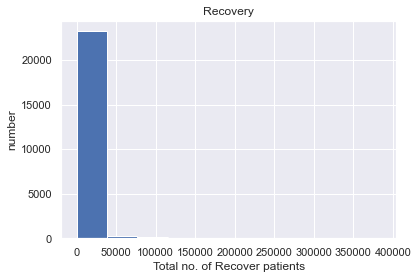

In [41]:
plt.hist(Recovery)
plt.title("Recovery")
plt.xlabel("Total no. of Recover patients")
plt.ylabel('number')

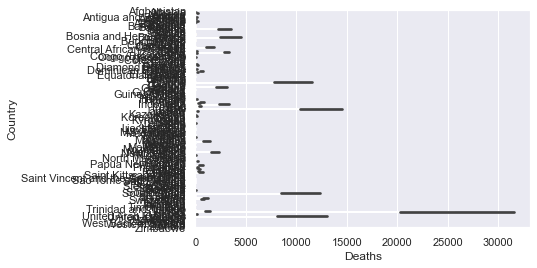

In [45]:
sns.barplot(y='Country', x='Deaths', data=df_virus)
plt.show()